In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [9]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [11]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [12]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

In [79]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
query_date = date - dt.timedelta(days=365)
#print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.prcp, 
                        Measurement.date).\
                  filter(Measurement.date > query_date).all()
prcp_df = pd.DataFrame(results)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = prcp_df.rename(columns={'prcp': 'Precipitation', 'date': 'Observation Date'})


# Sort the dataframe by date
prcp_df_sorted = prcp_df.sort_values('Observation Date', ascending=True).reset_index(drop=True)
prcp_df_final = prcp_df_sorted[['Precipitation','Observation Date']]
prcp_df_final = prcp_df_final.set_index('Observation Date')


prcp_df_final


,Precipitation
Observation Date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


In [80]:
prcp_df_final['Precipitation']

Observation Date
2016-08-24    0.08
2016-08-24     NaN
2016-08-24    2.15
2016-08-24    2.28
2016-08-24    2.15
              ... 
2017-08-22    0.00
2017-08-23    0.08
2017-08-23    0.00
2017-08-23    0.00
2017-08-23    0.45
Name: Precipitation, Length: 2223, dtype: float64

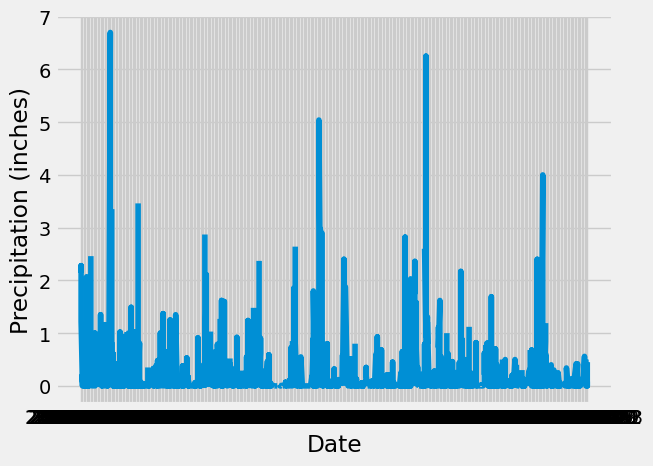

<Figure size 640x480 with 0 Axes>

In [81]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.plot(prcp_df_final['Precipitation'])

plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')

plt.xticks = ([1, 2, 3, 4, 5], ['2016-08-24', '2016-11-24', '2017-02-24', '2017-05-24', '2017-08-23'])

plt.show()
plt.tight_layout()





In [96]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = pd.DataFrame(prcp_df_sorted["Precipitation"].describe())
summary_stats

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [153]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [160]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [196]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs),  func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()    




[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [72]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures = session.query(Measurement.tobs, func.count(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > query_date).\
    group_by(Measurement.tobs).all()

temperatures



temperatures_df = pd.DataFrame(temperatures, columns=[['Temperature', 'Frequency']])

temperatures_df





,Temperature,Frequency
0,59.0,3
1,60.0,2
2,61.0,1
3,62.0,6
4,63.0,4
5,64.0,3
6,65.0,7
7,66.0,5
8,67.0,15
9,68.0,12


(array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <BarContainer object of 12 artists>)

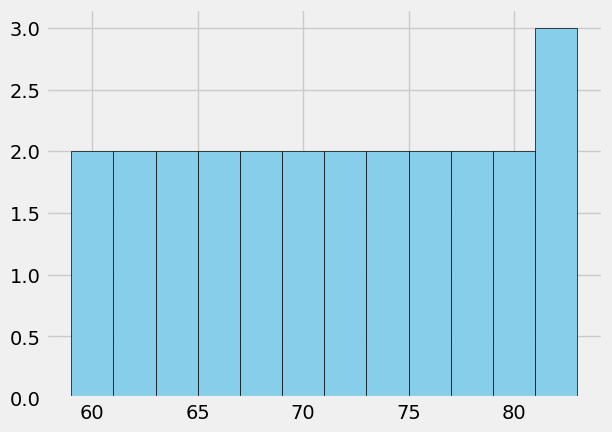

In [76]:
# Plotting a histogram
plt.hist(temperatures_df['Temperature'], bins=12, color='skyblue', edgecolor='black')
#plt.xlabel('Temperature')
#plt.ylabel('Frequency')
#plt.title('Temperature Distribution for the Past 12 Months')
#plt.grid(axis='y', alpha=0.75)
#plt.legend(['Data'])

#plt.show()

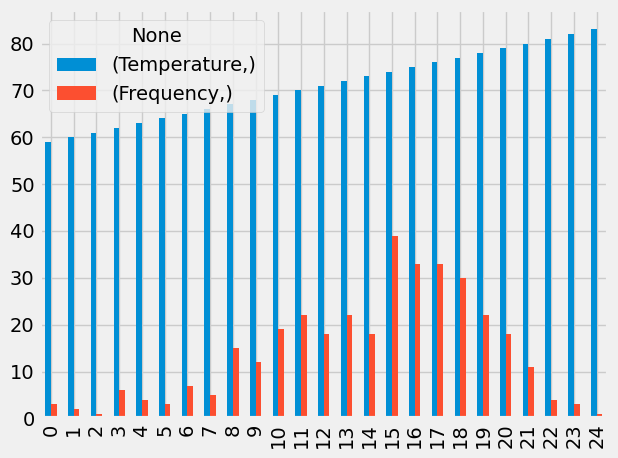

In [78]:

temperatures_df.plot.bar()
plt.tight_layout()
plt.show()

# Close Session

In [245]:
# Close Session
session.close()